# ProGAN 실행하기

훈련없이 몇 줄의 코드만으로 128x128 크기 얼굴 샘플을 생성할 수 있습니다!

In [6]:
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub

# TFHub에서 ProGAN을 임포트합니다.
module = hub.KerasLayer("https://tfhub.dev/google/progan-128/1")
# 생성할 샘플의 잠재 공간 차원
latent_dim = 512

# 시드를 바꾸면 다른 얼굴을 생성합니다.
latent_vector = tf.random.normal([1, latent_dim], seed=1337)

# 모듈을 사용해 잠재 공간에서 이미지를 생성합니다.
interpolated_images = module(latent_vector)

plt.imshow(interpolated_images.numpy().reshape(128,128,3))
plt.show()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


(20, 128, 128, 3)


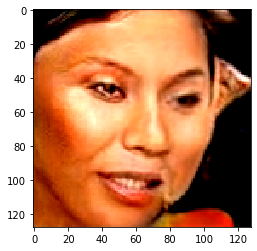

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
tf.compat.v1.disable_eager_execution()
import numpy as np

##########모델 로드

model = hub.Module('https://tfhub.dev/google/progan-128/1')

sess = tf.compat.v1.Session()
sess.run(tf.compat.v1.global_variables_initializer())

##########모델 예측

latent_vector = np.random.rand(20, 512)

latent_vector_placeholder = tf.compat.v1.placeholder(tf.float32, shape=(None, 512))
output_dict = model({'latent_vector': latent_vector_placeholder}, as_dict=True) 
predictions = output_dict['default']

y_predict = sess.run(predictions, feed_dict={latent_vector_placeholder: latent_vector})
print(y_predict.shape) #(20, 128, 128, 3)

plt.imshow(y_predict[0])
plt.show()